# Intro

A Markov chain is a stochastic model describing a sequence of possible events in which the probability of each event depends only on the state attained in the previous event. 

 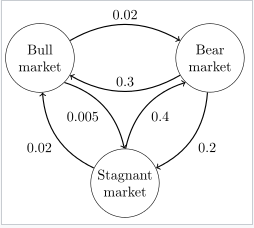 

Markov chains have many applications as statistical models of real-world processes,such as studying cruise control systems in motor vehicles, queues or lines of customers arriving at an airport, exchange rates of currencies, storage systems such as dams, and population growths of certain animal species. Other fields of applications of Markov Models are Physics, Testing, Speech recognition, text generators etc. 

In this application we will create a simple test generator based on Markov Models. This approach could easily used in Mobile Autocomplete applications for example.  

# Data cleaning
Firstly we want to strip the selected text from the unwanted characters. 

In [25]:
import re
import numpy as np

#Separating all words and punctuation with spaces and removing all double spaces.

f = open('C:\\anaconda3\\texts\\source1.txt') # inserting the base text 
contents = f.read()
f.close()
contents = re.sub('([.,!?();:])', r' \1 ', contents)
contents = re.sub('\s{2,}', ' ', contents)


    
f = open('C:\\anaconda3\\texts\\source1.txt', 'w') # inserting the base text
f.write(contents.replace('"',''))
f.close()

Now we will initialize the states and text matrices

In [84]:
text = []
states = []

with open('C:\\anaconda3\\texts\\source.txt','r') as f:
    for line in f:
        for word in line.split():
            text.append(word)
            if word not in states:
                states.append(word)
                
print(np.size(states))
#Creating a zeros transition matrix 
M = [[0]*np.size(states) for _ in range(np.size(states))]

print(len(M))

317


## Transition Matrix
The core of markov processes is the calculation of transition matrix. In the blocks bellow we firts count the state transitions and the overall probabilistic matrix. 

In [86]:
#instead of columns we fill rows with the successfull results(+1)
for i in range(len(states)):
    for j in range(len(text)-1):
        if states[i] == text[j]:
            temp = text[j + 1]
            for k in range(len(states)):
                if temp == states[k]:
                    M[i][k] += 1              

Calculating the propabilistic tranistion matrix

In [87]:
#instead of columns the code fills rows with the apropriate probabilities
for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]



Finaly we generate our text with the desired lenght. 
We did not expect the output text to be cohesive 

In [88]:

def text_generator(first_state,no_of_words): 
    print(first_state,end = " ")
    for i in range(no_of_words):
        counter = 0
        j = 0
        b=0
        for i in range(len(states)):
            if first_state == states[i]:
                state = i
                b = np.random.uniform(0,1,1)
        while counter < b :
            counter = counter + M[state][j]
            j = j + 1 
        print(states[j - 1],end = " ") ,
        first_state=states[j - 1]    #the index j-1 is given because of the absence of a do-while loop
              
            

In [89]:
#insert first state
first_state = states[0]



text_generator(first_state,30)
               

Should you , In the wind among the rain-shower and read this Song of all the bison , With the forest , For a people , in the Winter , Speak 